# Coursework

In [1]:
import numpy as np
from scipy.integrate import odeint
import pylab as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

## Solve the following systems of equations:

### Task 1 (10.9.7)
$\dot{y_1} = -0.04y_1 + 10^4y_2y_3$  
$\dot{y_2} = 0.04y_1 - 10^4y_2y_3 - 3\cdot10^7{y_2}^2$  
$\dot{y_3} = 3\cdot10^7{y_2}^2$ 

$y_1(0) = 1,$
$y_i(0) = 0,$
$i = \overline{1,2}$    

### Task 2 (10.9.8)

$\dot{y_1} = 77.27(y_2 + y_1(1 - 8.375\cdot10^{-6}y_1 - y_2))$   
$\dot{y_2} = 77.27^{-1}(y_3 - (1 + y_1)y_2)$  
$\dot{y_3} = 0.161(y_1 - y_3)$ 

$y_i(0) = 0.01,$
$i = \overline{1,3}$    

### Task 3 (10.9.9)
$\dot{y_1} = -Ay_1 - By_1y_3$  
$\dot{y_2} = Ay_1 - MCy_2y_3$   
$\dot{y_3} = Ay_1 - By_1y_3 - MCy_2y_3 + Cy_4$  
$\dot{y_4} = By_1y_3 - Cy_4$   

$A = 7.89\cdot10^{-10},$
$B = 1.1\cdot10^{7},$ 
$C = 1.13\cdot10^{3},$
$M = 10^{6}$

$y_1(0) = 1,76\cdot10^{-3},$
$y_i(0) = 0,$
$i = \overline{2,4}$ 

In [2]:
def equation_1(y, t):
    y1, y2, y3 = y
    dydt = [-0.04 * y1 + 1e4 * y2 * y3, 
           0.04 * y1 - 1e4 * y2 * y3 - 3e7 * (y2 ** 2),
           3e7 * (y2 ** 2)]
    return dydt

In [3]:
def equation_2(y, t):
    y1, y2, y3 = y
    dydt = [77.27 * (y2 + y1 * (1 - 8.375 * 1e-6 * y1 - y2)), 
           (1 / 77.27) * (y3 - (1 + y1) * y2),
           0.161 * (y1 - y3)]
    return dydt

In [4]:
def equation_3(y, t):
    A, B, C, M = 7.89e-10, 1.1e7, 1.13e3, 1e6
    y1, y2, y3, y4 = y
    dydt = [-A * y1 - B * y2 * y3, 
           A * y1 - M * C * y2 * y3,
           A * y1 - B * y1 * y3 - M * C * y2 * y3 + C * y4,
           B * y1 * y3 - C * y4]
    return dydt

$T_k^1 = 40, 10^{2}, 10^{3}, ..., 10^{11}$  
$T_k^2 = 800$  
$T_k^3 = 10^{3}, 10^{4}, ..., 10^{13}$

In [5]:
Ts_1 = [40] + [10 ** i for i in range(2, 12)]
Ts_2 = [800]
Ts_3 = [10 ** i for i in range(3, 14)]

In [6]:
def split(Ts, elements):
    return [np.linspace(0, T, elements) for T in Ts]    

In [7]:
ts_1 = split(Ts_1, 100000)
ts_2 = split(Ts_2, 100000)
ts_3 = split(Ts_3, 10000)

[scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html):

In [8]:
y0_1, ys_1 = [1., 0. , 0.], []
for t in ts_1:
    sol = odeint(equation_1, y0_1, t)
    ys_1.append([sol[:, 0], sol[:, 1], sol[:, 2]])

In [9]:
y0_2, ys_2 = [0.01, 0.01 , 0.01], []
for t in ts_2:
    sol = odeint(equation_2, y0_2, t)
    ys_2.append([sol[:, 0], sol[:, 1], sol[:, 2]])

In [10]:
y0_3, ys_3 = [1.76e-3, 0. , 0. , 0.], []  
for t in ts_3:
    sol = odeint(equation_3, y0_3, t)
    ys_3.append([sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]])

In [11]:
def make_plot(x, y, task, index=None, scale='linear', ylim=None):

    if task in [1, 3]:
        plt.subplot(4, 3, index + 1)
    elif task == 2:
        plt.axes().set_ylim(ylim)
        
    plt.plot(x, y[0], 'g', label = 'y1 (t)')
    plt.plot(x, y[1], 'r', label = 'y2 (t)')
    plt.plot(x, y[2], 'b', label = 'y3 (t)')
    if task == 3:
        plt.plot(x, y[3], 'y', label = 'y4 (t)')
    
    if task == 1:
        plt.title('T = 40' if (Ts_1[i] == 40) else 'T = 10^' + str(i+1))
    elif task == 2:
        plt.title('T = 800')
    elif task == 3:
        plt.title('T = 10^' + str(i+3))    
        
    plt.yscale(scale)
    plt.legend(loc = 'best')
    plt.xlabel('t', horizontalalignment='right', x=0.85)
    plt.grid()

In [12]:
def make_plot_ys(x, y, task):
    plt.figure(figsize=(18, 12))

    if task in [1, 2]:
        plotter_for_ys(y[0], y[1], xlabel='y0', ylabel='y1', index=0)
        plotter_for_ys(y[0], y[2], xlabel='y0', ylabel='y2', index=1)
        plotter_for_ys(y[1], y[2], xlabel='y1', ylabel='y2', index=2)
        
    elif task == 3:
        plotter_for_ys(y[0], y[1], xlabel='y0', ylabel='y1', index=0)
        plotter_for_ys(y[0], y[2], xlabel='y0', ylabel='y2', index=1)
        plotter_for_ys(y[0], y[3], xlabel='y0', ylabel='y3', index=2)
        plotter_for_ys(y[1], y[2], xlabel='y1', ylabel='y2', index=3)
        plotter_for_ys(y[1], y[3], xlabel='y1', ylabel='y3', index=4)
        plotter_for_ys(y[2], y[3], xlabel='y2', ylabel='y3', index=5)

In [13]:
def plotter_for_ys(x, y, xlabel, ylabel, index):
    ax = plt.subplot(3, 3, index + 1)
    plt.plot(x, y, label = ylabel + ' (' + xlabel + ')')
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%1.3e'))
    plt.legend(loc = 'best')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()

## Dependence of $y_i$ on $t$

### Task 1 - linear scale

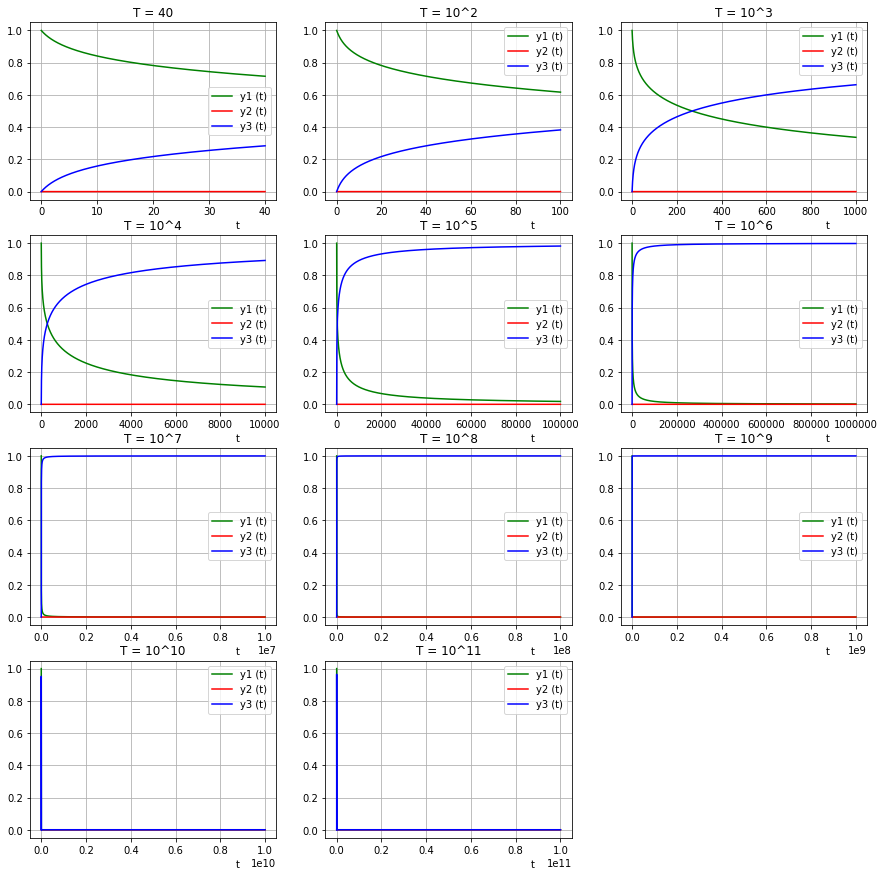

In [14]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_1)):
    make_plot(x=ts_1[i], y=ys_1[i], task=1, index=i)

### Task 1 - log scale

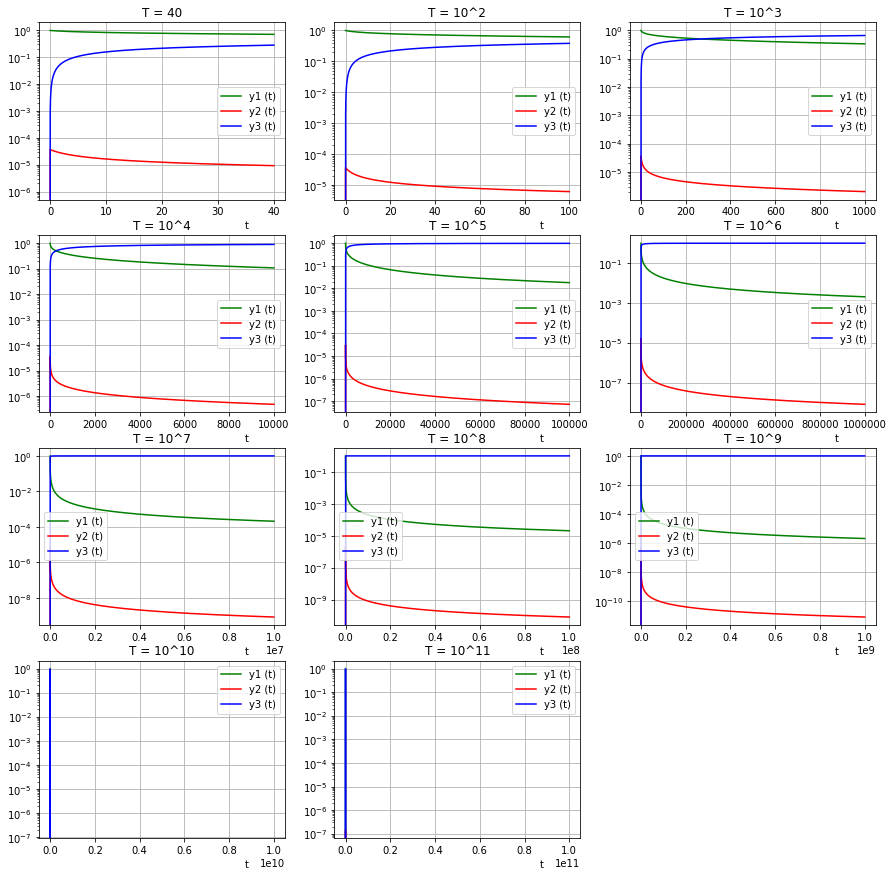

In [15]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_1)):
    make_plot(x=ts_1[i], y=ys_1[i], task=1, index = i, scale='log')

### Task 2

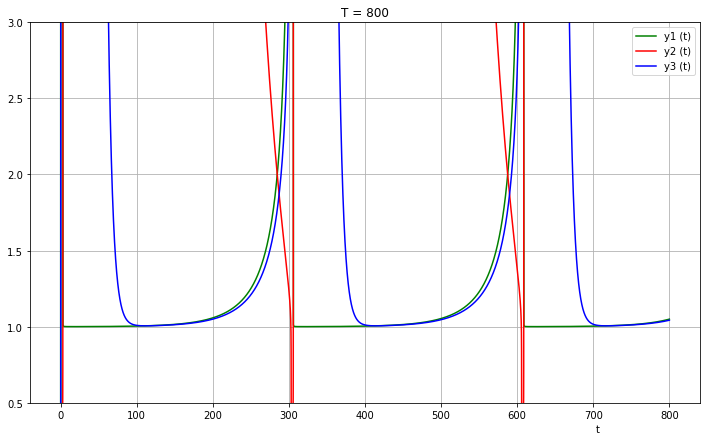

In [16]:
plt.figure(figsize=(12, 7))
make_plot(x=ts_2[0], y=ys_2[0], task=2, ylim = [0.5, 3])

### Task 3 - linear scale

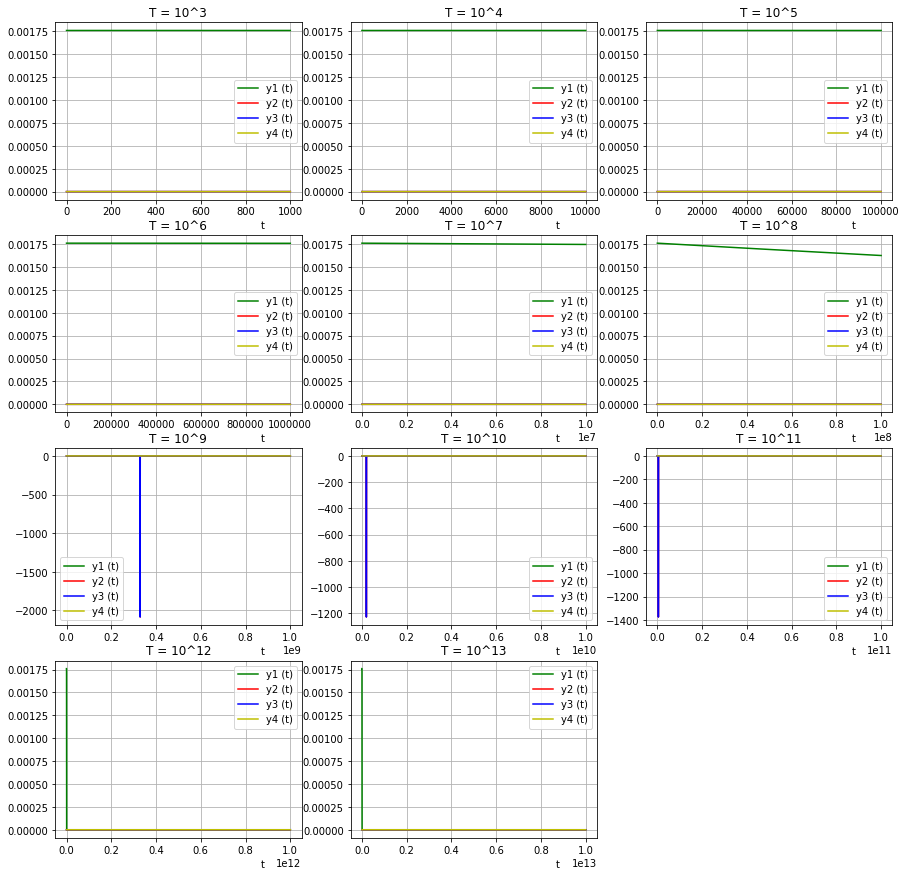

In [17]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_3)):
    make_plot(x=ts_3[i], y=ys_3[i], index=i, task=3)

### Task 3 - log scale

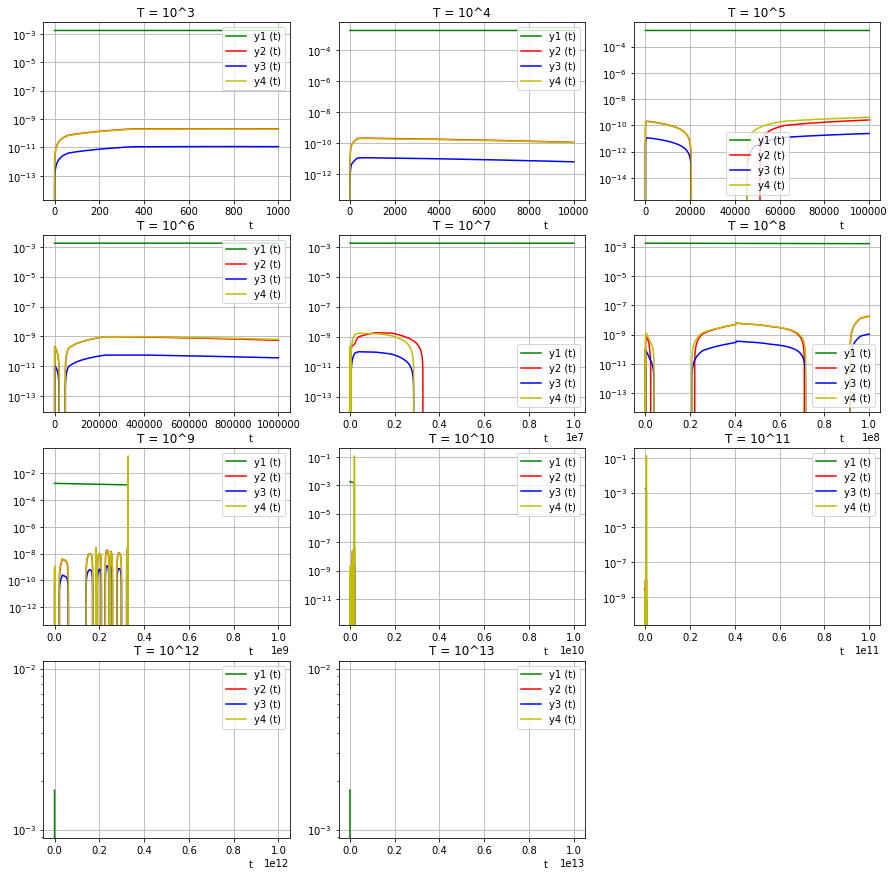

In [18]:
plt.figure(figsize=(15, 15))
for i in range(len(Ts_3)):
    make_plot(x=ts_3[i], y=ys_3[i], task=3, index=i, scale='log')

## Dependence of $y_i$ on $y_j$ ($y_i \neq y_j$)

### Task 1

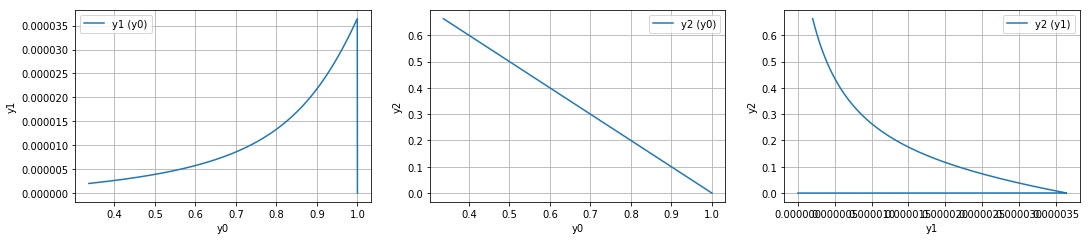

In [19]:
make_plot_ys(x=ts_1[2], y=ys_1[2], task = 1)

### Task 2

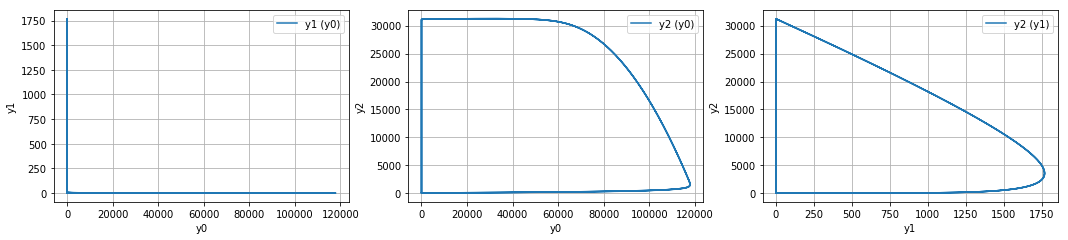

In [20]:
make_plot_ys(x=ts_2[0], y=ys_2[0], task = 2)

### Task 3

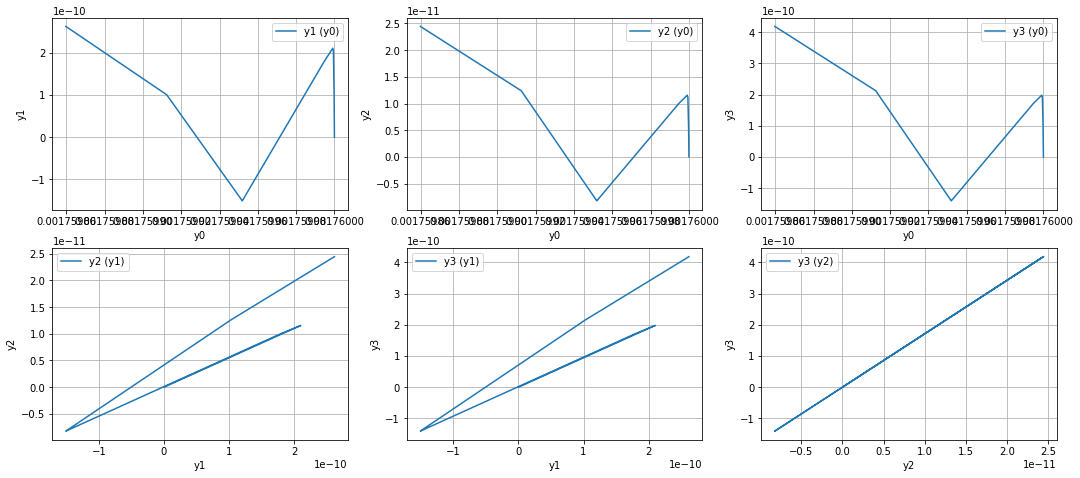

In [21]:
make_plot_ys(x=ts_3[2], y=ys_3[2], task = 3)